# Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('doctor_fee.csv')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
#handling missing data and all three features are categorical in nature so using fillna method with most frequent.
df['Rating'].fillna(df['Rating'].mode()[0], inplace = True)
df['Place'].fillna(df['Place'].mode()[0], inplace = True)
df['Miscellaneous_Info'].fillna(df['Miscellaneous_Info'].mode()[0], inplace = True)

In [6]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

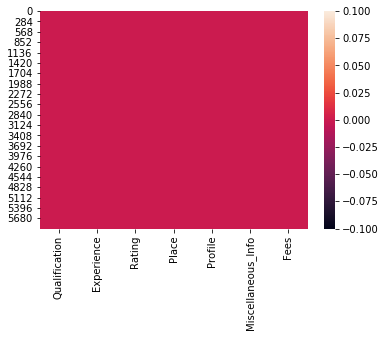

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info']

 ['Fees']


In [9]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  1
No of categorical features:  6


In [10]:
for col in cf:
    print(df[col].value_counts(),'\n') 

BDS                                                                                           488
BHMS                                                                                          477
BAMS                                                                                          471
MBBS                                                                                          334
MBBS, MS - ENT                                                                                220
                                                                                             ... 
BDS, MDS - Oral & Maxillofacial Surgery, Certificate of Oral Implantology                       1
DNB - Dermatology & Venereology                                                                 1
MBBS, DVD, Fellowship of College of General Practice (FCGP)                                     1
MBBS, MS - ENT, Diploma in Otorhinolaryngology (DLO), Diploma in Otorhinolaryngology (DLO)      1
MBBS, DNB - ENT, MS 

In [11]:
df['Fees'] = df['Fees'].astype(float)

# Statistics Summary

In [12]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [13]:
df.describe(include = ['O'])

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,5961,5961,5961,5961
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,3986,100,1397,2660


In [14]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100.0
1,73,3,49,866,0,1422,350.0
2,1135,63,0,457,3,1595,300.0
3,464,3,0,68,0,1695,250.0
4,10,12,0,337,0,253,250.0


# Data visualisation

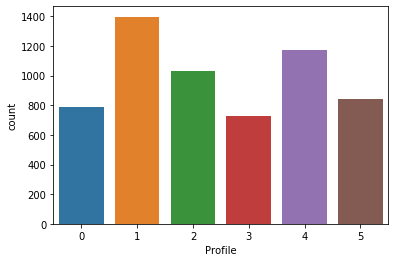

In [16]:
#univarite analysis
sns.countplot(df['Profile'])
plt.show()

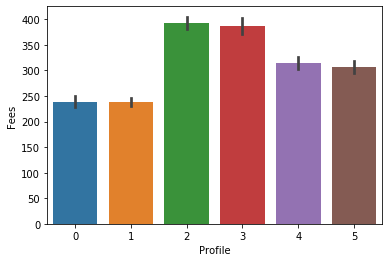

In [17]:
#bivariate analysis
sns.barplot(x='Profile',y='Fees',data=df) 
plt.show()

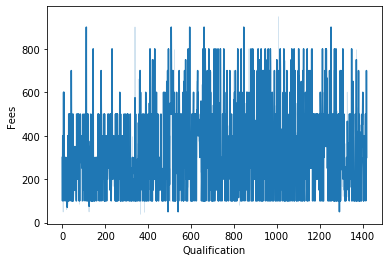

In [18]:
sns.lineplot(x='Qualification',y='Fees',data=df) 
plt.show()

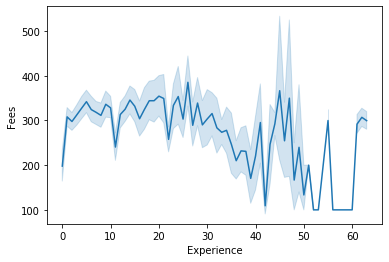

In [19]:
sns.lineplot(x='Experience',y='Fees',data=df) 
plt.show()

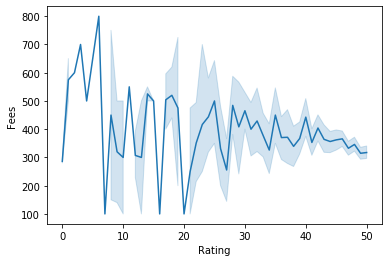

In [20]:
sns.lineplot(x='Rating',y='Fees',data=df) 
plt.show()

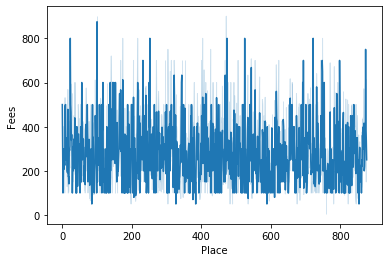

In [21]:
sns.lineplot(x='Place',y='Fees',data=df) 
plt.show()

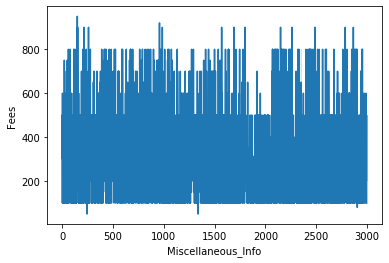

In [22]:
sns.lineplot(x='Miscellaneous_Info',y='Fees',data=df) 
plt.show()

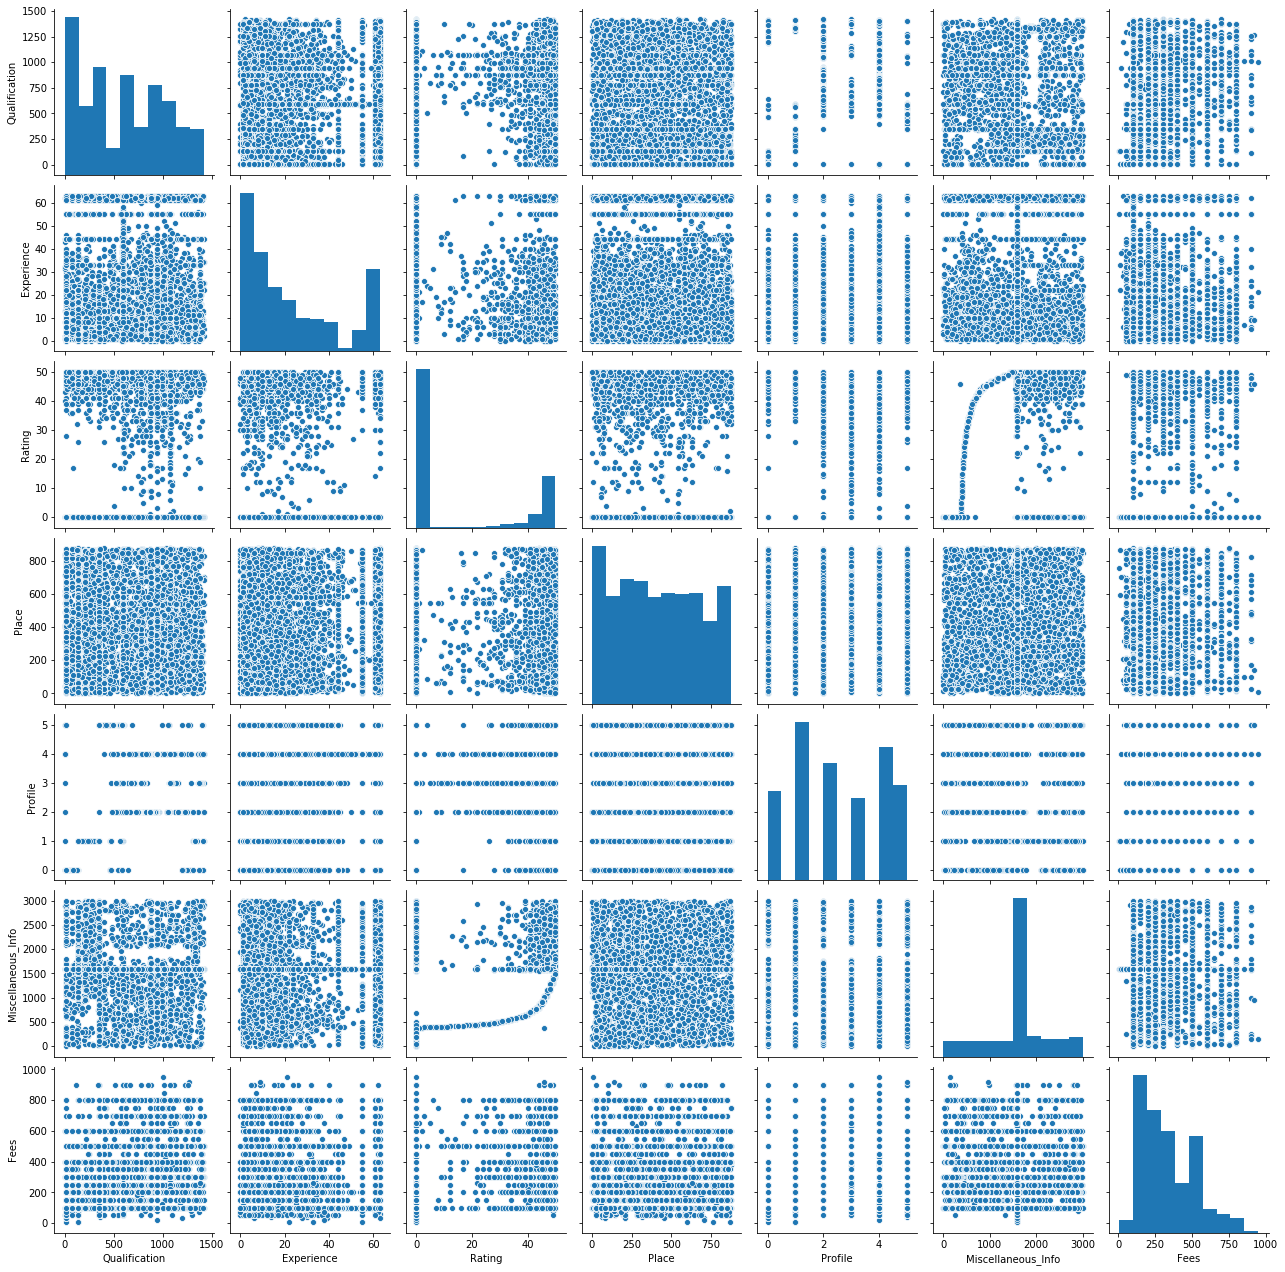

In [23]:
sns.pairplot(data=df) 
plt.show()

In [24]:
#correlation matrix
df.corr()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.003325,0.055188,0.006640,0.393123,-0.132786,0.263214
Experience,0.003325,1.000000,-0.139696,0.001328,-0.032711,0.035957,-0.048529
Rating,0.055188,-0.139696,1.000000,-0.031150,-0.101605,-0.077996,0.141853
Place,0.006640,0.001328,-0.031150,1.000000,0.019529,0.027901,-0.052505
Profile,0.393123,-0.032711,-0.101605,0.019529,1.000000,-0.155324,0.145226
Miscellaneous_Info,-0.132786,0.035957,-0.077996,0.027901,-0.155324,1.000000,-0.060715
Fees,0.263214,-0.048529,0.141853,-0.052505,0.145226,-0.060715,1.000000


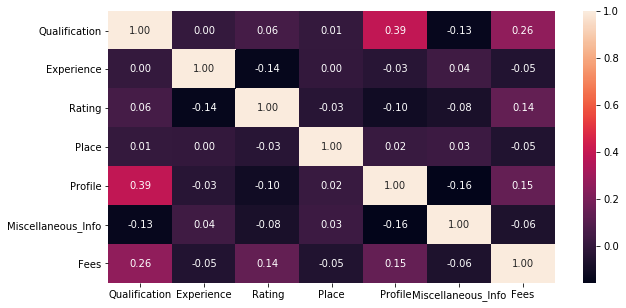

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

<Figure size 720x360 with 0 Axes>

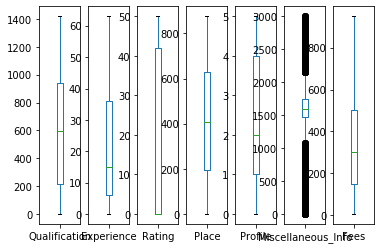

In [26]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(1,7)) 
plt.show()

In [27]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(5961, 7)
(5941, 7)


In [28]:
y=df["Fees"]
dfx=df.drop(columns=['Fees'], axis=1)
y.unique()

array([100., 350., 300., 250., 200., 700., 500., 400., 150., 650., 600.,
        50., 800., 750., 450.,  80.,  60., 550., 430., 130., 630., 499.,
       260.,  70.,  10., 299., 230., 380.,   5., 280.,  40.,  30., 180.,
       125., 850.,  20., 220.])

In [29]:
dfx.skew()

Qualification         0.242035
Experience            0.825063
Rating                0.817459
Place                 0.125450
Profile               0.111080
Miscellaneous_Info   -0.217883
dtype: float64

In [30]:
# handling skewness
from scipy.stats import boxcox
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.sqrt(dfx[col])

In [31]:
dfx.skew()

Qualification         0.242035
Experience            0.280357
Rating                0.758381
Place                 0.125450
Profile               0.111080
Miscellaneous_Info   -0.217883
dtype: float32

In [32]:
dfx.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,4.000000,0.0,299,5,130
1,73,1.732422,7.0,866,0,1422
2,1135,7.937500,0.0,457,3,1595
3,464,1.732422,0.0,68,0,1695
4,10,3.464844,0.0,337,0,253


In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,-0.471682,-0.106130,-0.697915,-0.446145,1.544355,-2.257181
1,-1.264132,-1.116937,1.541077,1.746856,-1.471162,-0.236763
2,1.301665,1.649071,-0.697915,0.164955,0.338148,0.033773
3,-0.319474,-1.116937,-0.697915,-1.339590,-1.471162,0.190152
4,-1.416340,-0.344684,-0.697915,-0.299172,-1.471162,-2.064835


# Prediction for Consultation Fees

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [35]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3980, 6) (1961, 6)
(3980,) (1961,)


In [36]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  43  is  0.10985414452161668


In [37]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
rbf
{'C': 10, 'kernel': 'rbf'}


In [38]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
11
uniform
{'n_neighbors': 11, 'weights': 'uniform'}


In [39]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [40]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [41]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_log_error(y_test,y_pred))
    print("root Mean squared log error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')


Cross_Val_Score =  0.1145616685529705


error:
r2 score is:  0.1297446888741678


root Mean squared log error:  0.6535972595050453


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.07447977642927024


error:
r2 score is:  0.07860206744790565


root Mean squared log error:  0.6474255857103489


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.09142396886704345


error:
r2 score is:  0.10985414452161668


root Mean squared log error:  0.67432

In [42]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_log_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_log_error
0,KNeighborsRegressor,0.114562,0.129745,0.653597
1,SVR,0.074480,0.078602,0.647426
2,LinearRegression,0.091424,0.109854,0.674328
3,LassoRegression,0.091528,0.109649,0.674761
4,RidgeRegressor,0.091425,0.109849,0.674332
5,DecisionTreeRegressor,-0.505096,-0.486238,0.826890
6,RandomForestRegressor,0.164025,0.194301,0.632530
7,AdaBoostRegressor,0.106757,0.110830,0.702914
8,GradientBoostingRegressor,0.187800,0.196853,0.636532


# Saving the best model

In [43]:
from sklearn.externals import joblib

In [44]:
joblib.dump(DT,'docfee.pkl')

['docfee.pkl']

In [45]:
model=joblib.load('docfee.pkl')

In [46]:
model.predict(x_test.head())

array([250., 100., 100., 300., 500.])